# Preamble: A lot of functions.

In [2]:
a,b,c,d,e,f = var('a,b,c,d,e,f')

In [33]:
def symbols_to_vector(symbolic_expression):
    symbols_vec = [0,a,b,c,d,e,f]
    string = str(symbolic_expression)
    vec = [0,0,0,0,0,0,0]
    sign = 1
    if string == "0":
        return vector(vec)
    for letter in string:
        if letter in [" "]:
            continue
        elif letter in ["+"]:
            sign = 1
        elif letter in ["-"]:
            sign = -1
        elif var(letter) in symbols_vec:
            index = symbols_vec.index(var(letter))
            vec[index] = 1*sign
    return vector(vec)

def vector_to_symbols(vec):
        symbols_vec = vector([0,a,b,c,d,e,f])
        return symbols_vec.dot_product(vector(vec))

class expression:
    
    def __init__(self, coordinates, assumptions):
        self.assumptions = assumptions
        self.coordinates = vector(coordinates)
        
    def is_valid_strict(self):
        #checks if a strict inequality (question) is satified under the assumptions of other strict inequalities
        #this is not satisfied if intP interected with H_c is nonempty
        P = Polyhedron(ieqs = self.assumptions)
        #complement of halfspace defined by strict inequality in question
        H_c = Polyhedron(ieqs = [[-i for i in self.coordinates]]) 
        if len(H_c.intersection(P).vertices())==0:
            return true
        else:
            for F in P.faces(5):
                if H_c.intersection(F.as_polyhedron()) == H_c.intersection(P):
                    return true
        return false
    
    def is_valid_nonstrict(self):
        #checks if a non-strict inequality (question) is satified under the assumptions of other strict inequalities
        #this is satisfied if intP is contained in H. H is closed, so this is equivalent to P contianed in H
        P = Polyhedron(ieqs = self.assumptions)
        H = Polyhedron(ieqs = [self.coordinates]) 
        if H.intersection(P)==P:
            return true
        else:     
            return false

    def  __gt__(self, other):
        #definition of >
        #return self.is_valid_strict(assumptions, self.coordinates - other.coordinates)
        return expression(coordinates = self.coordinates - other.coordinates, assumptions = self.assumptions).is_valid_strict()
    
    def __lt__(self,other):
        #definition of <
        return expression(coordinates = other.coordinates - self.coordinates, assumptions = self.assumptions).is_valid_strict()
    
    def __eq__(self, other):
        #definition of ==
        if expression(coordinates = self.coordinates - other.coordinates, assumptions = self.assumptions).is_valid_nonstrict() and expression(coordinates = other.coordinates - self.coordinates, assumptions = self.assumptions).is_valid_nonstrict(): 
            return true
        else:
            return false
    
    def __le__(self, other):
        #definition of <=
        return (self<other or self==other)
    
    def __ge__(self, other):
        #definition of >=
        return (self>other or self==other)
    
    def __add__(self,other):
        #definition of +
        return expression(coordinates = self.coordinates + other.coordinates, assumptions = self.assumptions)
    
    def __sub__(self,other):
        #definition of -
        return expression(coordinates = self.coordinates - other.coordinates, assumptions = self.assumptions)
    
    def is_comparable_to(self, other):
        if self>= other or self <= other:
            return true
        else:
            return false
        
    def as_symbols(self):
        symbols_vec = vector([0,a,b,c,d,e,f])
        return symbols_vec.dot_product(vector(self.coordinates))
    


def minimum(expr1, expr2):
    if expr1 <= expr2:
        return expr1
    elif expr2 <= expr1:
        return expr2
    else:
        print("cannot decide minimum of "+str(ieq1)+" and "+str(ieq2)+" under assumptions "+str(assumptions))

def intersect_trop_lines(assumptions, first,second):
    #translate symbolic expressions into vectors
    a_ex = expression(assumptions = assumptions, coordinates = symbols_to_vector(first[0]))
    b_ex = expression(assumptions = assumptions, coordinates = symbols_to_vector(first[1]))
    c_ex = expression(assumptions = assumptions, coordinates = symbols_to_vector(second[0]))
    d_ex = expression(assumptions = assumptions, coordinates = symbols_to_vector(second[1]))
    res = []
    if c_ex>a_ex and d_ex>b_ex and c_ex-a_ex<d_ex-b_ex: #region 1
        res = [c_ex, b_ex - a_ex + c_ex]
    #elif c_ex>a_ex and d_ex>b_ex and c_ex-a_ex==d_ex-b_ex: #region 1 intersected 2
    #    return []
    elif c_ex>a_ex and d_ex>b_ex and c_ex-a_ex>d_ex-b_ex: #region 2
        res = [a_ex - b_ex + d_ex, d_ex]
    #elif c_ex>a_ex and d_ex==b_ex and c_ex-a_ex>d_ex-b_ex: #region 2 intersected 3
    #    return []
    elif c_ex>a_ex and d_ex<b_ex and c_ex-a_ex>d_ex-b_ex: #region 3
        res = [a_ex, d_ex]
    #elif c_ex==a_ex and d_ex<b_ex and c_ex-a_ex>d_ex-b_ex: #region 3 intersected 4
    #    return []
    elif c_ex<a_ex and d_ex<b_ex and c_ex-a_ex>d_ex-b_ex: #region 4
        res = [a_ex, a_ex - c_ex + d_ex]
    #elif c_ex<a_ex and d_ex<b_ex and c_ex-a_ex==d_ex-b_ex: #region 4 intersected 5
    #    return []   
    elif c_ex<a_ex and d_ex<b_ex and c_ex-a_ex<d_ex-b_ex: #region 5
        res = [b_ex + c_ex - d_ex, b_ex]
    #elif c_ex<a_ex and d_ex==b_ex and c_ex-a_ex<d_ex-b_ex: #region 5 intersected 6
    #    return []
    elif c_ex<a_ex and d_ex>b_ex and c_ex-a_ex<d_ex-b_ex: #region 6
        res = [c_ex, b_ex]
    #elif c_ex==a_ex and d_ex>b_ex and c_ex-a_ex<d_ex-b_ex: #region 6 intersected 1
    #    return []
    
    elif a_ex>c_ex and b_ex>d_ex and a_ex-c_ex<b_ex-d_ex: #region 1
        res = [a_ex, d_ex - c_ex + a_ex]
    elif a_ex>c_ex and b_ex>d_ex and a_ex-c_ex>b_ex-d_ex: #region 2
        res = [c_ex - d_ex + b_ex, b_ex]
    elif a_ex>c_ex and b_ex<d_ex and a_ex-c_ex>b_ex-d_ex: #region 3
        res = [c_ex, b_ex]
    elif a_ex<c_ex and b_ex<d_ex and a_ex-c_ex>b_ex-d_ex: #region 4
        res = [c_ex, c_ex - a_ex + b_ex]  
    elif a_ex<c_ex and b_ex<d_ex and a_ex-c_ex<b_ex-d_ex: #region 5
        res = [d_ex + a_ex - b_ex, d_ex]
    elif a_ex<c_ex and b_ex>d_ex and a_ex-c_ex<b_ex-d_ex: #region 6
        res = [a_ex, d_ex]

    if len(res):
        return [el.as_symbols() for el in res]

    
class polytron:
    def __init__(self, assumptions, vertices):
        self.assumptions = assumptions
        self.vertices = vertices
        self.pseudovertices = self.get_pseudo_and_edges(assumptions, self.vertices)[0]
        self.edges = self.get_pseudo_and_edges(assumptions, vertices)[1]
        
    def get_pseudo_and_edges(self, assumptions, vertices):
        pseudovertices = copy(vertices)
        edges = []
        for pair in Subsets(range(len(vertices)),2):
            intersection = intersect_trop_lines(assumptions, vertices[pair[0]],vertices[pair[1]])
            if intersection:
                pseudovertices.append(intersection)
                index = len(pseudovertices)-1
                edges.append([pair[0],index])
                edges.append([pair[1],index])
            else:
                edges.append(list(pair))
        return [pseudovertices, edges]


def tangent_cone(polytron, vertex_index):
    
    def primitive_vector_in_edge_direction(assumptions, direction):
        x = expression(assumptions = assumptions, coordinates = symbols_to_vector(direction[0]))
        y = expression(assumptions = assumptions, coordinates = symbols_to_vector(direction[1]))
        x_negative = expression(assumptions = assumptions, coordinates = [-i for i in x.coordinates])
        y_negative = expression(assumptions = assumptions, coordinates = [-i for i in y.coordinates])
        zero = expression(assumptions = assumptions, coordinates = [0,0,0,0,0,0,0])
        
        if x==zero and y>zero:
            primitive = [ 0, 1]
        elif x==zero and y<zero:
            primitive = [ 0,-1]
        elif x>zero and y>zero:
            primitive = [ 1, 1]
        elif x>zero and y==zero:
            primitive = [ 1, 0]
        elif x<zero and y==zero:
            primitive = [-1, 0]
        elif x<zero and y<zero:
            primitive = [-1,-1]
        else:
            print 'cannot find primitive vector in direction ('+str(x.coordinates)+' , '+str(y.coordinates)+') under assumptions '+str(x.assumptions)
        return primitive
    
    ##compute the generating function of the tangent cone at the given vertex
    vertex = polytron.pseudovertices[vertex_index]
    
    
    #find neighbours of vertex
    incident_edges_index = [edge for edge in polytron.edges if vertex_index in edge]
    neighbours_index = []
    for edge_index in incident_edges_index:
        for index in edge_index:
            if index==vertex_index:
                continue
            else:
                neighbours_index.append(index)    
    neighbours = [ polytron.pseudovertices[index] for index in neighbours_index ]
    
    #compute edge-directions
    edge_directions = [ [neighbour[0]-vertex[0],neighbour[1]-vertex[1]] for neighbour in neighbours ]
    
    primitives=[]
    #find primitive vector in edge-direction
    for direction in edge_directions:
        primitives.append(primitive_vector_in_edge_direction(polytron.assumptions, direction))
    
    
    t1, t2, n = var('t1, t2, n')
    return ( t1^(n*vertex[0])* t2^(n*vertex[1]) )  / ( (1 - t1^primitives[0][0] * t2^primitives[0][1]) * (1 - t1^primitives[1][0] * t2^primitives[1][1])  )


# The Data Structure

For each combinatorial type of polytropes, our input consists of inequalities of the form $a-b+f > 0$ in terms of variables $a,b,c,d,e,f$. For practical reasons, we translate such inequalities to $0 / \pm 1$-vectors. 

For example, the inequality $a > 0$ is translated to $(0, 1, 0, 0, 0, 0)$,  $b > 0$ is translated to $(0, 0, 1, 0, 0, 0, 0)$ and $a-b+f>0$ becomes $(0, 1, -1, 0, 0, 0, 1)$. 

Instead of symbolic expressions, we work with the class ``expression``. An ``expression`` consists two things: <br/>
1. The ``coordinates`` is a $0/\pm 1$-vector, that corresponds to a symbolic expression. <br/>
2. The ``assumptions`` is a list of assumptions, also corresponding to symbolic exressions.

The expression ``e1`` below corrsponds to the symbolic expression $a>0$ under the assumptions $a>0, a+b>0$, the expression ``e2`` corresponds to the symbolic expression $b>0$ under the same assumption, and ``zero`` corresponds to $0$. 

In [4]:
e1 = expression(coordinates = [0,1,0,0,0,0,0], assumptions = [[0,1,0,0,0,0,0],[0,1,1,0,0,0,0]])
e2 = expression(coordinates = [0,0,1,0,0,0,0], assumptions = [[0,1,0,0,0,0,0],[0,1,1,0,0,0,0]])
zero = expression(coordinates = [0,0,0,0,0,0,0], assumptions = [[0,1,0,0,0,0,0],[0,1,1,0,0,0,0]])
e1.as_symbols()

a

When we test if $a>0$ is valid under these assumptions, then internally the expression generates the polyhedron that is defined by the inequalities given by ```assumptions``` and checks whether the interior of this polyhedron is contained in the open halfspace that has ```coordinates``` as normal vector.

In [5]:
e1.is_valid_strict()

True

If both expressions have the same asumptions, then we can add them up.

In [6]:
g = e1+e2
print g.as_symbols()
print g.coordinates

a + b
(0, 1, 1, 0, 0, 0, 0)


We can try to compare them:

In [7]:
print e1.is_comparable_to(e2)
print zero.is_comparable_to(g)

False
True


If they are comparable, we can find the minimum:

In [8]:
print zero < g
print minimum(zero,g).as_symbols()

True
0


# Constructing the Kleene fan

Making the Polyhedral Subdivision of $\mathbb R^d$  for 6 variables

The Setup: 

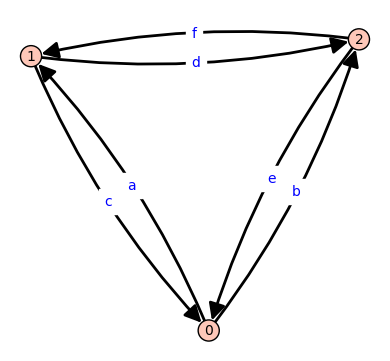

In [9]:
D = matrix([[0,a,b],[c,0,d],[e,f,0]])
DG = DiGraph(D,weighted = True)
DG.show(edge_labels = True)

Here is the Kleene star of D:
D_Star = $
\begin{pmatrix}
min(0,a+c,b+e) & min(a,a,b+f)   & min(b,a+d,b) \\
min(c,c,d+e)   & min(a+c,0,d+f) & min(c+b,d,d) \\
min(e,f+c,e)   & min(a+e,f,f)   & min(e+b,d+f,0)
\end{pmatrix}$

Creating the regions of the Kleene fan

In [10]:
#(1,1)
R1   = Polyhedron(ieqs = [[0,-1,1,-1,0,1,0],[0,-1,0,-1,0,0,0]])
R2   = Polyhedron(ieqs = [[0,1,0,1,0,0,0],[0,0,1,0,0,1,0]])
R3   = Polyhedron(ieqs = [[0,0,-1,0,0,-1,0],[0,1,-1,1,0,-1,0]])
F11  = [R1,R2,R3]
#(1,2)
R4   = Polyhedron(ieqs = [[0,-1,1,0,0,0,1]])
R5   = Polyhedron(ieqs = [[0,1,-1,0,0,0,-1]])
F12  = [R4,R5]
#(1,3)
R6   = Polyhedron(ieqs = [[0,1,-1,0,1,0,0]])
R7   = Polyhedron(ieqs = [[0,-1,1,0,-1,0,0]])
F13  = [R6,R7]
#(2,1)
R8   = Polyhedron(ieqs = [[0,0,0,-1,1,1,0]])
R9   = Polyhedron(ieqs = [[0,0,0,1,-1,-1,0]])
F21  = [R8,R9]
#(2,2)
R10  = Polyhedron(ieqs = [[0,-1,0,-1,1,0,1],[0,-1,0,-1,0,0,0]])
R11  = Polyhedron(ieqs = [[0,0,0,0,1,0,1],[0,1,0,1,0,0,0]])
R12  = Polyhedron(ieqs = [[0,0,0,0,-1,0,-1],[0,1,0,1,-1,0,-1]])
F22  = [R10,R11,R12]
#(2,3)
R13  = Polyhedron(ieqs = [[0,0,1,1,-1,0,0]])
R14  = Polyhedron(ieqs = [[0,0,-1,-1,1,0,0]])
F23  = [R13,R14]
#(3,1)
R15  = Polyhedron(ieqs = [[0,0,0,1,0,-1,1]])
R16  = Polyhedron(ieqs = [[0,0,0,-1,0,1,-1]])
F31  = [R15,R16]
#(3,2)
R17  = Polyhedron(ieqs = [[0,1,0,0,0,1,-1]])
R18  = Polyhedron(ieqs = [[0,-1,0,0,0,-1,1]])
F32  = [R17,R18]
#(3,3)
R19  = Polyhedron(ieqs = [[0,0,-1,0,1,-1,1],[0,0,-1,0,0,-1,0]])
R20  = Polyhedron(ieqs = [[0,0,1,0,0,1,0],[0,0,0,0,1,0,1]])
R21  = Polyhedron(ieqs = [[0,0,1,0,-1,1,-1],[0,0,0,0,-1,0,-1]])
F33  = [R19,R20,R21]
#nonnegative coordinates
R22 = Polyhedron(ieqs = [[0,1, 0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0],[0,0,0,0,1,0,0],[0,0,0,0,0,1,0],[0,0,0,0,0,0,1]])
F = [R22]

Find the feasible, full dimensional regions:

In [11]:
def regions_of_complex(polyhedral_complex):
    r"""
    Returns the feasible regions of the ``polyhedral_complex``.
    Follows the method of regions in the hyperplane arrangements.
    
    INPUT: 
    
    - ``polyhedral_complex`` -- list. A list of polyhedron objects
    
    OUTPUT:
    
    A tuple of regions.
    """
    R = polyhedral_complex[0][0].base_ring()
    universe = Polyhedron(eqns = [[0] + [0]*6],base_ring = R)
    regions = [universe]
    for fan in polyhedral_complex:
        subdivided = []
        for region in regions:
            for cone in fan:
                part = region.intersection(cone)
                if part.dim()==6:
                    subdivided.append(part)
        regions = subdivided
    return tuple(regions)

Test it on the fans

In [12]:
six_variables_complex = [F11,F12,F13,F21,F22,F23,F31,F32,F33,F]
regions = regions_of_complex(six_variables_complex)

In [13]:
len(regions)

18

Discard the infeasible regions

In [14]:
def feasible_regions(initial_regions):
    r"""
    From the regions of a polyhedral complex, return the feasible regions.
    
    INPUT:
    
    -  ``initial_regions`` -- tuple of polyhedron objects. 
    
    OUTPUT:
    
    tuple of polyhedron objects representiing the feasible regions.
    """

    final_regions = list(initial_regions)
    for region in initial_regions:
        ass = region.inequalities_list()
        q1 = expression(coordinates = [0,1, 0,1, 0, 0, 0], assumptions = ass)
        q2 = expression(coordinates = [0, 0,1, 0, 0,1, 0], assumptions = ass)
        q3 = expression(coordinates = [0, 0, 0, 0,1, 0,1], assumptions = ass)
        if q1.is_valid_strict() and q2.is_valid_strict() and q3.is_valid_strict():
            continue
        else:
            final_regions.remove(region)
    return final_regions

In [15]:
feas_regs = feasible_regions(regions)

In [16]:
len(feas_regs)

18

# Computing the Polytropes

In [17]:
first_region= feas_regs[0]
first_region.inequalities_list()

[[0, -1, 1, 0, 0, 0, 1],
 [0, 0, 0, -1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, -1, 1],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 1, -1, 0, 0],
 [0, 1, -1, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, -1]]

The ```first_region``` is defined by the inequalities <br/>
$a < b + f$ <br/>
$c < d + e$ <br/>
$e < c + f$ <br/>
$d < b + c$ <br/>
$b < a + d$ <br/>
$f < a + e$ <br/>
$a,b,c,d,e,f > 0$

These inequalities imply the following kleene star:
D_star_one = 
$\begin{pmatrix}
0 & a & b \\
c & 0 & d \\
e & f & 0
\end{pmatrix}$

This Kleene star corresponds to a polytrope with tropical vertices $(a,b), (-c, d-c), (f-e, -e)$, given the above inequalities. This is a hexagon.

In [18]:
def tropical_vertices_from_region(region):
    r"""
    Return the symbolic tropical vertices corresponding to 
    a certain region. 
    
    INPUT:
    
    - ``region`` -- a polyhedron object. 
    
    OUTPUT:
    
    A list of the tropical vertices (already in the plane). 
    """

    ass = region.inequalities_list()
    zero = expression(assumptions = ass, coordinates = [0, 0, 0, 0, 0, 0, 0])
    a_ex = expression(assumptions = ass, coordinates = [0, 1, 0, 0, 0, 0, 0])
    b_ex = expression(assumptions = ass, coordinates = [0, 0, 1, 0, 0, 0, 0])
    c_ex = expression(assumptions = ass, coordinates = [0, 0, 0, 1, 0, 0, 0])
    d_ex = expression(assumptions = ass, coordinates = [0, 0, 0, 0, 1, 0, 0])
    e_ex = expression(assumptions = ass, coordinates = [0, 0, 0, 0, 0, 1, 0])
    f_ex = expression(assumptions = ass, coordinates = [0, 0, 0, 0, 0, 0, 1])
    K = [ [zero,                    minimum(a_ex,b_ex+f_ex), minimum(a_ex+d_ex,b_ex)],
          [minimum(c_ex,d_ex+e_ex), zero,                    minimum(c_ex+b_ex,d_ex)],
          [minimum(f_ex+c_ex,e_ex), minimum(a_ex+e_ex,f_ex), zero                   ]]
    symbols_vec = vector([0,a,b,c,d,e,f])
    Kleene = []
    for row in K:
        Kleene.append([ symbols_vec.dot_product(entry.coordinates) for entry in row ])
    Kleene = matrix(Kleene)
    #subtract the first entry
    L = list()
    for i in range(len(Kleene.rows())):
        new_row = list()
        j = Kleene.row(i)[0]
        for k in range(1,len(Kleene.row(i))):
            new_row.append(Kleene.row(i)[k] - j)
        L.append(new_row)
    return L

In [19]:
verts = tropical_vertices_from_region(first_region)
verts

[[a, b], [-c, -c + d], [-e + f, -e]]

Given the tropical vertices and the respective set of inequalities, we can now define our polytrope.

In [20]:
ass = first_region.inequalities_list()
poly = polytron(assumptions = ass, vertices = verts)

In [21]:
poly.vertices

[[a, b], [-c, -c + d], [-e + f, -e]]

In [22]:
poly.pseudovertices

[[a, b], [-c, -c + d], [-e + f, -e], [b - d, b], [a, a - f], [-c, -e]]

# Generating function and Ehrhart Polynomial

We compute the generating function using Brion's Theorem

In [23]:
def gen_fct(polytron):
    return sum([tangent_cone(polytron,vertex_index) for vertex_index in range(len(polytron.pseudovertices))])

In [24]:
generating_f = gen_fct(poly).factor()
generating_f

(t1^2*t1^(a*n)*t1^(c*n)*t1^(e*n)*t2^2*t2^(b*n)*t2^(c*n)*t2^(e*n)/(t1^(f*n)*t2^(d*n)) - t1*t1^(a*n)*t1^(c*n)*t1^(e*n)*t2*t2^(b*n)*t2^(c*n)*t2^(e*n)/(t1^(f*n)*t2^(d*n)) - t1*t1^(b*n)*t1^(c*n)*t1^(e*n)*t2^2*t2^(b*n)*t2^(c*n)*t2^(e*n)/(t1^(d*n)*t1^(f*n)*t2^(d*n)) - t1^2*t1^(a*n)*t1^(c*n)*t1^(e*n)*t2*t2^(a*n)*t2^(c*n)*t2^(e*n)/(t1^(f*n)*t2^(d*n)*t2^(f*n)) + t1*t1^(b*n)*t1^(c*n)*t1^(e*n)*t2*t2^(b*n)*t2^(c*n)*t2^(e*n)/(t1^(d*n)*t1^(f*n)*t2^(d*n)) + t1*t1^(a*n)*t1^(c*n)*t1^(e*n)*t2*t2^(a*n)*t2^(c*n)*t2^(e*n)/(t1^(f*n)*t2^(d*n)*t2^(f*n)) - t1*t1^(c*n)*t2*t2^(c*n)/t2^(d*n) - t1*t1^(e*n)*t2*t2^(e*n)/t1^(f*n) + t1*t1^(c*n)*t2^(c*n)/t2^(d*n) + t1*t1^(e*n)*t2*t2^(c*n)/(t1^(f*n)*t2^(d*n)) + t1^(e*n)*t2*t2^(e*n)/t1^(f*n) - t1^(e*n)*t2^(c*n)/(t1^(f*n)*t2^(d*n)))/((t1*t2 - 1)*(t1 - 1)*t1^(c*n)*t1^((e - f)*n)*(t2 - 1)*t2^((c - d)*n)*t2^(e*n))

We can get the Ehrhart Pplynomial by evaluating the generating function at $(1,\dots,1)$. But since this would mean division by zero in this case, we first have to replace all variables by $(1-t)$ apply l'hopital.

In [25]:
def lhopital(generating_f):
    #substitute all variables by (1-t)
    t = var('t')
    for j in range(1,3):
         generating_f = generating_f.subs({var('t'+str(j)):1-t})
        #generating_f = generating_f.subs({var('t'+str(j)):1-j*t})
    
    #l'hopital
    p = generating_f.numerator()
    q = generating_f.denominator()
    alpha = 0
    p_deriv= p
    q_deriv = q
    while true:
        p_deriv = p_deriv.derivative(t)
        q_deriv = q_deriv.derivative(t)
        alpha += 1
        if not (p_deriv(t=0)==0 or q_deriv(t=0)==0):
            break
    return p_deriv(t=0)/q_deriv(t=0)

In [26]:
ehrhart = lhopital(generating_f).simplify_full()
ehrhart

-1/2*(a^2 - 2*a*b + b^2 + c^2 - 2*(b + c)*d + d^2 - 2*c*e + e^2 - 2*(a + e)*f + f^2)*n^2 + 1/2*(a + b + c + d + e + f)*n + 1

# Do it for all regions.

Computing the generating function for all feasible regions

In [28]:
count = -1
generating_fcts = {}
for region in feas_regs:
    verts = tropical_vertices_from_region(region)
    ass = region.inequalities_list()
    poly = polytron(ass, verts)
    count += 1
    print 'computed polytron for region '+str(count)
    try:
        generating_f = gen_fct(poly).factor()
        generating_fcts[generating_f] = ass
    except:
        print 'impossible to compute generating function for region '+str(count)
        continue

computed polytron for region 0
computed polytron for region 1
computed polytron for region 2
computed polytron for region 3
computed polytron for region 4
computed polytron for region 5
computed polytron for region 6
computed polytron for region 7
computed polytron for region 8
computed polytron for region 9
computed polytron for region 10
computed polytron for region 11
computed polytron for region 12
computed polytron for region 13
computed polytron for region 14
computed polytron for region 15
computed polytron for region 16
computed polytron for region 17


In [30]:
multivariate_ehrhart = {}
for generating_f, ieqs in generating_fcts.items():
    ehr = lhopital(generating_f).simplify_full()
    multivariate_ehrhart[ehr] = ieqs

In [39]:
for ehr, ieqs in multivariate_ehrhart.items():
    print ehr
    conditions = [vector_to_symbols(ieq)>0 for ieq in ieqs]
    print "   if "+str(conditions).strip('[]')
    print ""

1/2*(2*a*d + d^2 + 2*d*e + 2*(a + e)*f - f^2)*n^2 + 1/2*(2*a + 3*d + 2*e + f)*n + 1
   if -a + b - d > 0, f > 0, e > 0, d > 0, c - d - e > 0, a + e - f > 0, a > 0

-1/2*(a^2 - 2*a*b - 2*b*c - 2*c*e + e^2 - 2*(a + e)*f + f^2)*n^2 + 1/2*(a + 2*b + 2*c + e + f)*n + 1
   if -a + b + f > 0, -b - c + d > 0, f > 0, e > 0, a + e - f > 0, c - e + f > 0, c > 0, b > 0, a > 0

-1/2*(a^2 - 2*a*b + b^2 - 2*(b + c)*d + d^2 - 2*(a + c)*f)*n^2 + 1/2*(a + b + 2*c + d + 2*f)*n + 1
   if -a + b + f > 0, -c + e - f > 0, f > 0, a > 0, d > 0, c > 0, b > 0, b + c - d > 0, a - b + d > 0

-1/2*(a^2 - 2*a*b + b^2 - 2*b*d - 2*d*e - 2*(a + e)*f + f^2)*n^2 + 1/2*(a + b + 2*d + 2*e + f)*n + 1
   if -a + b + f > 0, f > 0, e > 0, d > 0, c - d - e > 0, b > 0, a - b + d > 0, a > 0, a + e - f > 0

1/2*(2*a*b - b^2 + 2*b*d + 2*(a + d)*e + e^2)*n^2 + 1/2*(2*a + b + 2*d + 3*e)*n + 1
   if -a - e + f > 0, a > 0, e > 0, d > 0, c - d - e > 0, b > 0, a - b + d > 0

((a + c)*d + (a + c)*f)*n^2 + (a + c + d + f)*n + 1
   if -a + 